In [1]:
import numpy as np
import pyaudio 
import matplotlib.pyplot as plt

In [2]:
PyAudio = pyaudio.PyAudio

In [3]:
bitrate = 48000 # kHz
sound_len = 10 # second
waveform = np.ndarray((int(sound_len * bitrate)), dtype=np.float32)
base_fr = 80.0
f1 = base_fr
f2 = base_fr + 0.75

In [4]:
for i in range(len(waveform)):
    frac = 1 + i / len(waveform)
    waveform[i] = np.sin(f1 * i / bitrate * 2 * np.pi) + np.sin(f2 * i / bitrate * 2 * np.pi) 
waveform /= np.max(waveform)    

In [5]:
linear_increase = np.linspace(0, 1, bitrate * 1)
linear_decrease = np.linspace(1, 0, bitrate * 1)
waveform[:len(linear_increase) ] *= linear_increase
waveform[-len(linear_decrease):] *= linear_decrease

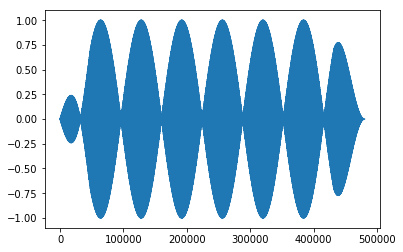

In [6]:
plt.plot(waveform)

In [7]:
def play_audio(waveform):
    p = PyAudio()
    stream = p.open(format = pyaudio.paFloat32, 
                    channels = 1, 
                    rate = int(bitrate), 
                    output = True)

    stream.write(waveform, num_frames = len(waveform))
    stream.stop_stream()
    stream.close()
    p.terminate()

In [8]:
import threading
x = threading.Thread(target=play_audio, args=(waveform,))

In [9]:
x.start()

In [496]:
x.join()

In [ ]:
play_audio(waveform)